**Table of contents**<a id='toc0_'></a>    
- [**IMPORTS**](#toc1_)    
- [**DATASET BUILDING**](#toc2_)    
  - [Main Dataset](#toc2_1_)    
  - [Test Dataset](#toc2_2_)    
- [**DATA PREPROCESSING**](#toc3_)    
- [**GENERATING TRAINING AND TESTING DATASET**](#toc4_)    
- [**MODEL BUILDING**](#toc5_)    
  - [KNN Classifier](#toc5_1_)    
  - [Gaussian Naive-Bayes](#toc5_2_)    
  - [Decision Tree](#toc5_3_)    
  - [Hybrid Model](#toc5_4_)    
- [**VISUALISATION**](#toc6_)    
  - [Scatter Graph](#toc6_1_)    
  - [HEATMAP](#toc6_2_)    
- [**MODEL SAVING**](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[**IMPORTS**](#toc0_)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from dotenv import load_dotenv
import os
load_dotenv()

True

# <a id='toc2_'></a>[**DATASET BUILDING**](#toc0_)

## <a id='toc2_1_'></a>[Main Dataset](#toc0_)

In [3]:
n_random_rows = 700000

header = pd.read_csv(os.getenv('BALANCED_DATASET_LOCATION'), nrows=1)

dataset = pd.read_csv(os.getenv('BALANCED_DATASET_LOCATION'), nrows=n_random_rows, skiprows=6100000, header=None)

dataset.columns = header.columns

## <a id='toc2_2_'></a>[Test Dataset](#toc0_)

In [4]:
n_random_rows = 700000

test_header = pd.read_csv(os.getenv('IMBALANCED_DATASET_LOCATION'), nrows=1)

testset = pd.read_csv(os.getenv('IMBALANCED_DATASET_LOCATION'), nrows=n_random_rows, skiprows=1200000, header=None)

testset.columns = test_header.columns

# <a id='toc3_'></a>[**DATA PREPROCESSING**](#toc0_)

In [6]:
dataset.sample(5)

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
151671,3401005,172.31.69.25-18.219.193.20-80-43272-6,172.31.69.25,80,18.219.193.20,43272,6,16/02/2018 11:26:41 PM,4321830,4,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
407940,2712604,172.31.65.107-23.62.6.19-50759-80-6,172.31.65.107,50759,23.62.6.19,80,6,20/02/2018 09:46:46,115661609,16,...,20,29605.545455,28671.340120,116052.0,20859.0,1.000351e+07,21947.115143,10010254.0,9937338.0,Benign
625448,6729991,172.31.66.79-216.58.198.78-49225-443-6,172.31.66.79,49225,216.58.198.78,443,6,20/02/2018 08:50:00,106276772,42,...,20,233265.857143,7108.421682,248250.0,229200.0,1.491637e+07,81182.529209,15056393.0,14839332.0,Benign
363130,3612464,172.31.69.25-18.219.193.20-80-43908-6,172.31.69.25,80,18.219.193.20,43908,6,16/02/2018 11:28:15 PM,4520594,4,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
568807,7055184,169.254.169.254-172.31.67.59-80-51274-6,172.31.67.59,51274,169.254.169.254,80,6,20/02/2018 12:34:40,97,2,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 85 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         700000 non-null  int64  
 1   Flow ID            700000 non-null  object 
 2   Src IP             700000 non-null  object 
 3   Src Port           700000 non-null  int64  
 4   Dst IP             700000 non-null  object 
 5   Dst Port           700000 non-null  int64  
 6   Protocol           700000 non-null  int64  
 7   Timestamp          700000 non-null  object 
 8   Flow Duration      700000 non-null  int64  
 9   Tot Fwd Pkts       700000 non-null  int64  
 10  Tot Bwd Pkts       700000 non-null  int64  
 11  TotLen Fwd Pkts    700000 non-null  float64
 12  TotLen Bwd Pkts    700000 non-null  float64
 13  Fwd Pkt Len Max    700000 non-null  float64
 14  Fwd Pkt Len Min    700000 non-null  float64
 15  Fwd Pkt Len Mean   700000 non-null  float64
 16  Fw

In [8]:
dataset.columns

Index(['Unnamed: 0', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port',
       'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag

In [5]:
attrs = ['Flow ID','Timestamp','Fwd Seg Size Min','Src IP','Dst IP','Flow IAT Min','Src Port','Tot Fwd Pkts','Init Bwd Win Byts','Label']
dataset = dataset[attrs]
testset = testset[attrs]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow ID            700000 non-null  object 
 1   Timestamp          700000 non-null  object 
 2   Fwd Seg Size Min   700000 non-null  int64  
 3   Src IP             700000 non-null  object 
 4   Dst IP             700000 non-null  object 
 5   Flow IAT Min       700000 non-null  float64
 6   Src Port           700000 non-null  int64  
 7   Tot Fwd Pkts       700000 non-null  int64  
 8   Init Bwd Win Byts  700000 non-null  int64  
 9   Label              700000 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 53.4+ MB


In [10]:
dataset.sample(5)

,Flow ID,Timestamp,Fwd Seg Size Min,Src IP,Dst IP,Flow IAT Min,Src Port,Tot Fwd Pkts,Init Bwd Win Byts,Label
19303,172.31.69.25-18.219.193.20-80-36098-6,16/02/2018 11:25:42 PM,0,172.31.69.25,18.219.193.20,5.0,80,4,211,ddos
34557,172.31.69.25-18.219.193.20-80-57814-6,16/02/2018 11:25:50 PM,0,172.31.69.25,18.219.193.20,7.0,80,4,211,ddos
354332,172.31.69.25-18.219.193.20-80-48122-6,16/02/2018 11:28:11 PM,0,172.31.69.25,18.219.193.20,6.0,80,4,211,ddos
159692,172.31.69.25-18.219.193.20-80-36594-6,16/02/2018 11:26:45 PM,0,172.31.69.25,18.219.193.20,6.0,80,4,211,ddos
565369,172.31.66.25-104.208.232.49-51481-443-6,20/02/2018 11:12:22,20,172.31.66.25,104.208.232.49,0.0,51481,20,510,Benign


In [11]:
dataset['Label'].value_counts()

Label
ddos      372648
Benign    327352
Name: count, dtype: int64

In [12]:
testset['Label'].value_counts()

Label
Benign    605470
ddos       94530
Name: count, dtype: int64

### Shape


In [13]:
dataset.shape

(700000, 10)

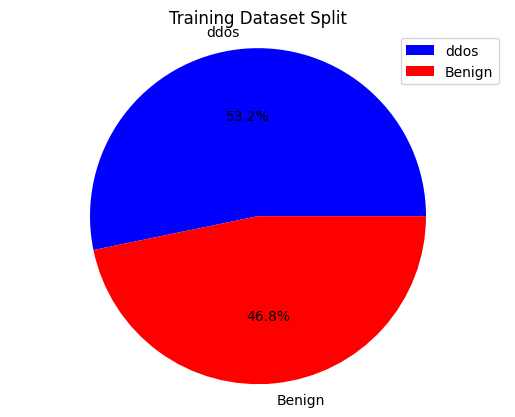

In [14]:
label = 'ddos','Benign'
sizes = [len(dataset[dataset["Label"]=="ddos"]),len(dataset[dataset["Label"]=="Benign"])]
plt.pie(sizes,labels=label,colors=['blue','red'],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc='best')
plt.title('Training Dataset Split')
plt.show()

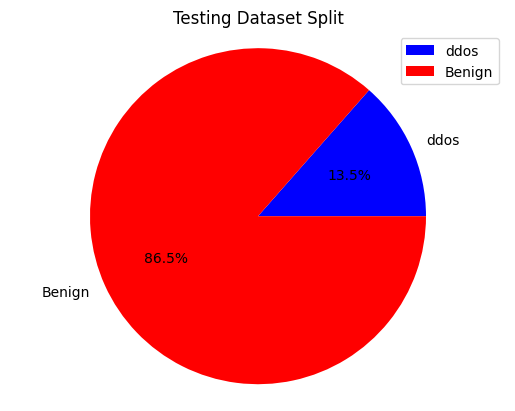

In [6]:
label = 'ddos','Benign'
sizes = [len(testset[testset["Label"]=="ddos"]),len(testset[testset["Label"]=="Benign"])]
plt.pie(sizes,labels=label,colors=['blue','red'],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc='best')
plt.title('Testing Dataset Split')
plt.show()

In [7]:
dataset['new_SRC_IP'] = LabelEncoder().fit_transform(dataset['Src IP'])
dataset['new_DST_IP'] = LabelEncoder().fit_transform(dataset['Dst IP'])
dataset['new_Timestamp'] = LabelEncoder().fit_transform(dataset['Timestamp'])
testset['new_SRC_IP'] = LabelEncoder().fit_transform(testset['Src IP'])
testset['new_DST_IP'] = LabelEncoder().fit_transform(testset['Dst IP'])
testset['new_Timestamp'] = LabelEncoder().fit_transform(testset['Timestamp'])


In [17]:
testset.isna().sum()

Flow ID              0
Timestamp            0
Fwd Seg Size Min     0
Src IP               0
Dst IP               0
Flow IAT Min         0
Src Port             0
Tot Fwd Pkts         0
Init Bwd Win Byts    0
Label                0
new_SRC_IP           0
new_DST_IP           0
new_Timestamp        0
dtype: int64

# <a id='toc6_'></a>[**VISUALISATION**](#toc0_)

## <a id='toc6_1_'></a>[Scatter Graph](#toc0_)



In [8]:
ddos_set = dataset[dataset.Label == 'ddos']
benign_set = dataset[dataset.Label == 'Benign']
X = dataset.drop(['Label','Flow ID','Src IP','Dst IP'], axis='columns')
Y = dataset['Label'].replace(to_replace = ['ddos','Benign'], value=[1,0])


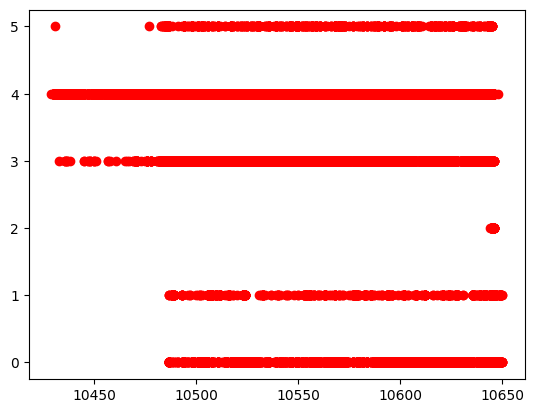

In [19]:
plt.scatter(ddos_set['new_Timestamp'],ddos_set['Tot Fwd Pkts'], color = 'red')
plt.show()

In [20]:
#the above graph shows that in a ddos attack packets are sent continuously over a period of time

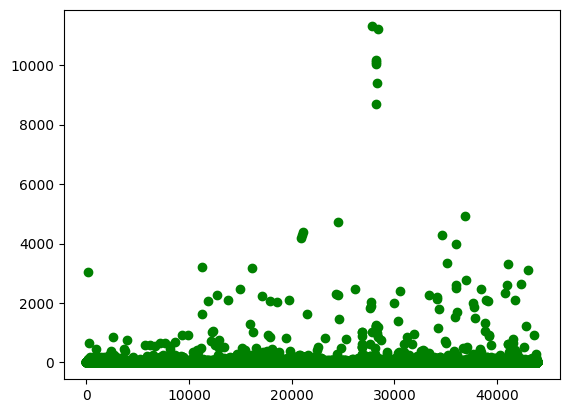

In [21]:
plt.scatter(benign_set['new_Timestamp'],benign_set['Tot Fwd Pkts'], color = 'green')
plt.show()

In [22]:
# the above graph shows that benign packets are well spread over a time period

(array([6.99832e+05, 5.40000e+01, 2.50000e+01, 2.10000e+01, 1.00000e+01,
        6.00000e+00, 4.00000e+00, 1.50000e+01, 9.00000e+00, 4.00000e+00,
        2.00000e+00, 4.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        3.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([    0.   ,   282.575,   565.15 ,   847.725,  1130.3  ,  1412.875,
         1695.45 ,  1978.025,  2260.6  ,  2543.175,  2825.75 ,  3108.325,
         3390.9  ,  3673.475,  3956.05 ,  4238.625,  4521.2  ,  4803.775,
         5086.35 ,  5368.925,  5651.5  ,  5934.075,  6216.65 ,  6499.225,
         6781.8  ,  7064.375,  7346.95 ,  7629.525,  7912.1  ,  8194.675,
         8477.25 ,  8759.825,  9042.4  ,  93

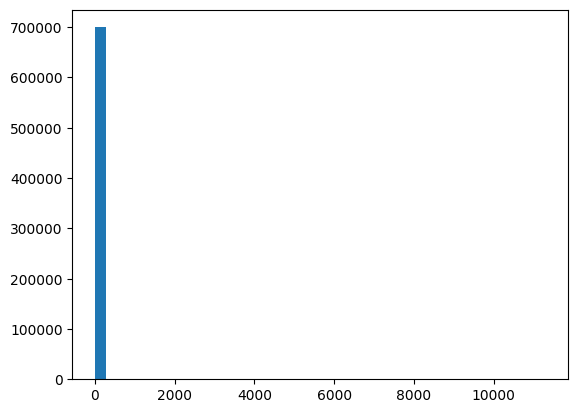

In [12]:
X.index = X['new_Timestamp']
plt.hist(X['Tot Fwd Pkts'],bins=100)
plt.show()

## <a id='toc6_2_'></a>[HEATMAP](#toc0_)

In [ ]:
X = X.drop(['Timestamp'], axis=1)
sns.heatmap(X.corr(method='pearson'), xticklabels=X.corr().columns, yticklabels=X.corr().columns,annot=True,fmt=".2f",linewidth=.5)
plt.show()

In [ ]:
X.corrwith(Y).sort_values()

# <a id='toc4_'></a>[**GENERATING TRAINING AND TESTING DATASET**](#toc0_)

In [ ]:
X = dataset.drop(['Label','Flow ID','Timestamp','Src IP','Dst IP'], axis='columns')
X.sample(5)

In [ ]:
Y = dataset['Label']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.4)

In [ ]:
new_X_TEST = testset.drop(['Label','Flow ID','Timestamp','Src IP','Dst IP'], axis='columns')
new_Y_TEST = testset['Label']

# <a id='toc5_'></a>[**MODEL BUILDING**](#toc0_)

## <a id='toc5_1_'></a>[KNN Classifier](#toc0_)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

In [ ]:
knn_accuracy = accuracy_score(new_Y_TEST,knn.predict(new_X_TEST))
print(f"KNN Accuracy: {knn_accuracy*100:.2f}%")

## <a id='toc5_2_'></a>[Gaussian Naive-Bayes](#toc0_)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

In [ ]:
gnb_accuracy = accuracy_score(new_Y_TEST, gnb.predict(new_X_TEST))
print(f"Naive-Bayes Accuracy: {gnb_accuracy*100:.2f}%")

## <a id='toc5_3_'></a>[Decision Tree](#toc0_)

In [ ]:
dt = DecisionTreeClassifier()

dt.fit(X_train,Y_train)

In [ ]:
dt_accuracy = accuracy_score(new_Y_TEST, dt.predict(new_X_TEST))
print(f"Decision Tree Accuracy: {dt_accuracy*100:.2f}%")

## <a id='toc5_4_'></a>[Hybrid Model](#toc0_)

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(X_train, Y_train, stratify=Y_train,test_size=0.4)

In [ ]:
knn.fit(train_x,train_y)
y_val_knn = knn.predict(test_x)
y_val_knn = pd.DataFrame(y_val_knn)
y_test_knn = knn.predict(X_test)
y_test_knn = pd.DataFrame(y_test_knn)

y_val_knn.columns = ['Label_KNN']
y_test_knn.columns = ['Label_KNN']


In [ ]:
gnb.fit(train_x,train_y)
y_val_gnb = gnb.predict(test_x)
y_val_gnb = pd.DataFrame(y_val_gnb)
y_test_gnb = gnb.predict(X_test)
y_test_gnb = pd.DataFrame(y_test_gnb)

y_val_gnb.columns = ['Label_GNB']
y_test_gnb.columns = ['Label_GNB']


In [ ]:
dt.fit(train_x,train_y)
y_val_dt = dt.predict(test_x)
y_val_dt = pd.DataFrame(y_val_dt)
y_test_dt = dt.predict(X_test)
y_test_dt = pd.DataFrame(y_test_dt)

y_val_dt.columns = ['Label_DT']
y_test_dt.columns = ['Label_DT']

In [ ]:
final_X_input = pd.concat([pd.DataFrame(test_x,columns=X.columns)], axis = 1)

new_attr = pd.concat([pd.DataFrame(y_val_knn,columns=y_val_knn.columns)], axis = 1)
new_attr.columns = ['LABEL']
for i in range(len(y_val_knn)):
    if (y_val_knn['Label_KNN'][i] == 'ddos' and y_val_gnb['Label_GNB'][i] =='ddos') or (y_val_dt['Label_DT'][i] == 'ddos' and y_val_gnb['Label_GNB'][i] =='ddos') or (y_val_knn['Label_KNN'][i] == 'ddos' and y_val_dt['Label_DT'][i] =='ddos'):
        new_attr['LABEL'][i] = 'ddos'
    else:
        new_attr['LABEL'][i] = 'Benign'

final_y_input = pd.concat([pd.DataFrame(new_attr, columns=new_attr.columns)], axis = 1)

In [ ]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(final_X_input,final_y_input.values.ravel())

In [ ]:
rf_accuracy = accuracy_score(new_Y_TEST, rf.predict(new_X_TEST))
print(f"Random Forest Accuracy: {rf_accuracy*100:.2f}%")

prediction = rf.predict(X_train)

In [ ]:
prediction

# <a id='toc7_'></a>[**MODEL SAVING**](#toc0_)

In [ ]:
import pickle
with open("Detect_DDoS.pickle",'wb') as model:
    pickle.dump(rf, model)

In [ ]:
import json
columns = {
    'data columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as cols_json:
    cols_json.write(json.dumps(columns))